Overview
* load data and split to training and test set
* looking at data
* building neural network and saving it
* loading nerual network and test its performance

The data itself

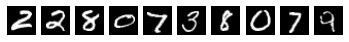

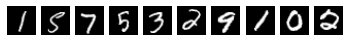

In [1]:
from mnist_model import *

mnistmodel = MnistModel(batch_size=100)

mnist_training = MnistTrainingModel(mnistmodel)
mnist_training.show_images(num_images=10)


plt.show()
mnist_testing = MnistTestingModel(mnistmodel)
mnist_testing.show_images(num_images=10)

plt.show()

## Neural Network:

three layers

- input layer: ReLU activation

- hidden layer: ReLU activation

- output layer: LogSoftmax activation

$\text{LogSoftmax}(x_i) = \log(\frac{e^{x_i}}{\sum_je^{x_i}})$

In [2]:
from torch import nn

layer_size_params = {"input": 784,
                    "hidden": [128, 64],
                    "output": 10}

input_size = layer_size_params["input"]
hidden_sizes = layer_size_params["hidden"]
output_size = layer_size_params["output"]

nn_model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(nn_model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


Training


Training complete
model saved: /saved_models/mnist_nn.pth


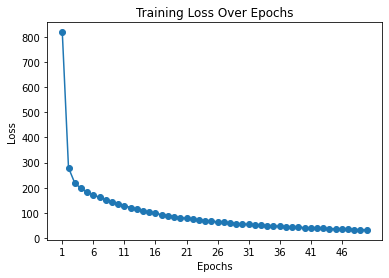

In [3]:
from training_classes import *
training_images = MnistTrainingModel(mnistmodel).images
training_labels = MnistTrainingModel(mnistmodel).labels
training_data = MnistTrainingModel(mnistmodel).train_data


nn_training = NeuralNetTrain(training_data, 
                             nn_model, layer_size_params, 
                             criterion_instance = nn.NLLLoss(),
                             lr = 0.001, momentum = 0.9, 
                             epochs = 50,
                             name = "mnist_nn")

nn_training.train()

Seeing the model's performance

Number of Correct Predictions: 9731
Number Of Images Tested = 10000
Model Accuracy = 0.9731


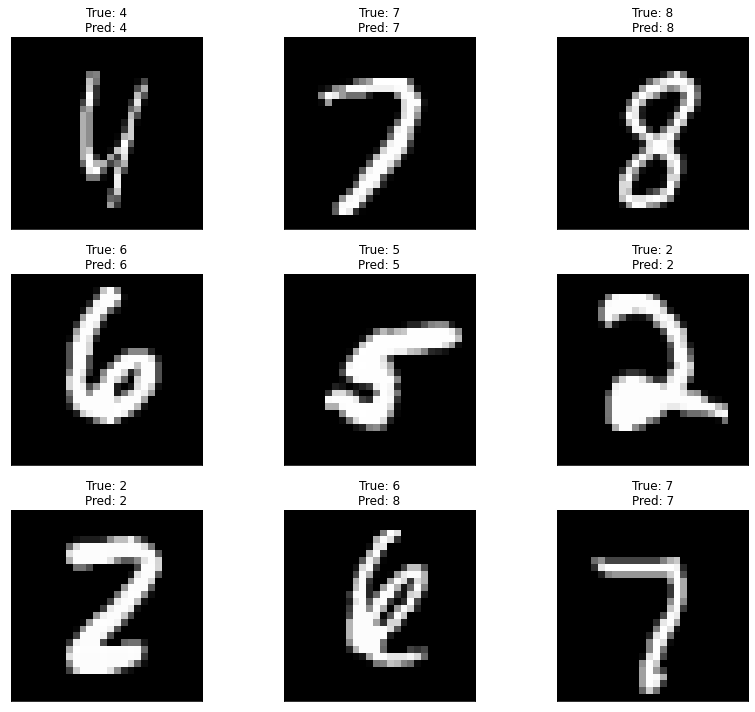

In [4]:
testing_data = MnistTestingModel(mnistmodel).test_data

# Load the pre-trained weights from the checkpoint
checkpoint = torch.load("./saved_models/mnist_nn.pth")

# loading weights and biases after training from the saved neural net
nn_model.load_state_dict(checkpoint['model_state_dict'])

# Create an instance of NeuralNetTest with the loaded model and testing data
testing_model = NeuralNetTest(nn_model, testing_data)

# Run the testing
testing_model.run_test()